# Multi-layer Forward-feed NN 

## NN on Handwritten Digits

In [1]:
%matplotlib inline
# All imports

from __future__ import print_function, division
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display

import sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cross_validation import train_test_split

np.set_printoptions(formatter={'float': '{:.5f}'.format})
print(sklearn.__version__)



0.18.dev0


/Users/labuser/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Multiple-label Classification -- Example: Handwritten Digits

In [2]:
'''

Find out what the object digits contain

Plot first 4 digits in handwritten dataset.

'''

# Import datasets, classifiers and performance metrics
from sklearn import datasets

# The digits dataset
digits = datasets.load_digits()

# digits are of a sklearn defned class: Bunch
print(type(digits))

<class 'sklearn.datasets.base.Bunch'>


In [3]:
# gives all the methods
print(dir(digits))

['__class__', '__cmp__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'fromkeys', 'get', 'has_key', 'items', 'iteritems', 'iterkeys', 'itervalues', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values', 'viewitems', 'viewkeys', 'viewvalues']


In [4]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [5]:
type(digits.data)

numpy.ndarray

In [6]:
digits.data.shape

(1797, 64)

In [7]:
type(digits.images)

numpy.ndarray

In [8]:
digits.images.shape

(1797, 8, 8)

In [9]:
type(digits.target)

numpy.ndarray

In [10]:
digits.target.shape

(1797,)

## Mini-breakout 1

## Show one of the images (say the 14th one), and use the target value as the title for your plot

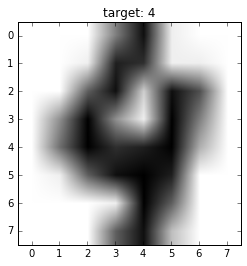

In [11]:
plt.imshow(digits.images[14], cmap =plt.cm.gray_r)
plt.title('target: {}'.format(digits.target[14]))
plt.show()

## Mini-break 2
## Show that digits.image and digits.data are the same thing, just shaped differently by showing one of the images (say the 14th one), using both .data and .image.

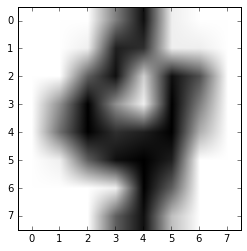

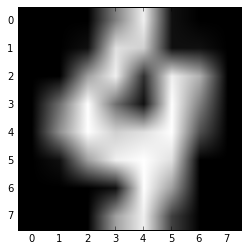

In [12]:
plt.figure(1)
plt.figure(211)
plt.imshow(digits.images[14], cmap =plt.cm.gray_r)
plt.figure(212)
plt.imshow(digits.data[14].reshape(8, -1), cmap = plt.cm.gray)
plt.show()

## Breakout

## a) Show the first 8 of the images in 2 rows, with 4 images in each row.
## b) Use the target value as the title for your plot.
## c) Remove the x and y axes around each image.

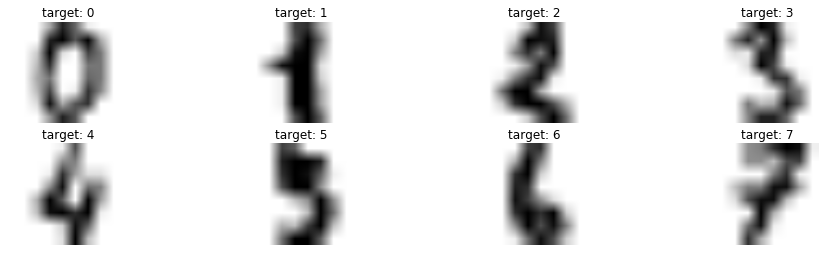

In [13]:
plt.figure(figsize=(16, 4))
for i in range(8):
    plt.subplot(241 + i)
    plt.imshow(digits.images[i], cmap =plt.cm.gray_r)
    plt.title('target: {}'.format(digits.target[i]))
    plt.axis('off')
plt.show()

## Breakout Exercise

## Instantiate a NN classifier, clf
## Decide on NN structure
## Train it on one digit, say the 14th.

5


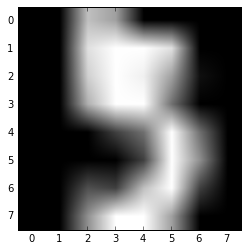

In [14]:
idx_select = 5
clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(4, 2), random_state=1)
clf.fit(np.atleast_2d(digits.data[idx_select]), np.atleast_1d(digits.target[idx_select]))
print(clf.predict(np.atleast_2d(digits.data[idx_select]))[0])
plt.imshow(digits.images[idx_select], cmap = plt.cm.gray)
plt.show()




In [16]:
print(np.atleast_2d(digits.data[idx_select]).shape)
print(np.atleast_1d(digits.target[idx_select]).shape)

(1, 64)
(1,)


## Breakout Exercise

## Instantiate a NN classifier, clf
## Train it on first 100 digits
## Test the trained model on next 100 digits.
## Report on training and validation scores

## Repeat above steps by training on first 500 digits, and test the model on next 500 digits.

In [19]:
digits = datasets.load_digits()

Train Score: 0.892
Test Score: 0.682


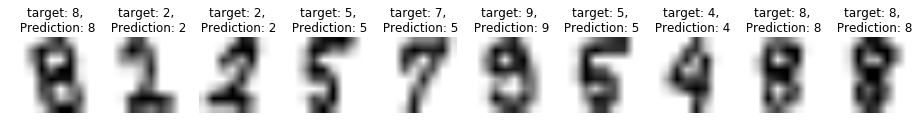

In [20]:
# clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(4, 2), random_state=1)
clf2 = MLPClassifier(algorithm='l-bfgs', alpha=1e-10, hidden_layer_sizes=(10, 4), activation = 'tanh', \
                    random_state=5, max_iter=1000000, learning_rate_init = 0.1)

N = 500

clf2.fit(digits.data[:N], digits.target[:N])
# print(clf2.predict(np.atleast_2d(digits.data[N:N+100])))
print('Train Score: {}'.format(clf2.score(digits.data[:N], digits.target[:N])))
print('Test Score: {}'.format(clf2.score(digits.data[N:N+N], digits.target[N:N+N])))

plt.figure(figsize=(16, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[N+i], cmap =plt.cm.gray_r)
    plt.title('target: {},\n Prediction: {}'.format(digits.target[N+i], clf2.predict(np.atleast_2d(digits.data[N+i]))[0]))
    plt.axis('off')
plt.show()

In [21]:
print(digits.data[:N].shape)
print(digits.target[:N].shape)

(500, 64)
(500,)


# End of Week10-1